In [ ]:
import pickle 
import os
from tqdm import tqdm
from collections import deque
import pandas as pd
import numpy as np

In [ ]:
def Load(file):
    f = open(file, "rb")
    obj = pickle.load(f)
    f.close()
    return obj

In [ ]:
def Save(_object, file):
    filehandler = open(file, 'wb') 
    pickle.dump(_object, filehandler)


In [ ]:
data_dir = "./data"
target_dir = "./archive"
files = [data_dir+"/"+x for x in os.listdir(data_dir) if "_m5.csv" in x]
print(files)

In [ ]:
class candle_class:
    def __init__(self, o,h,l,c,t):
        self.o=o
        self.h=h
        self.l=l
        self.c=c
        self.t=t


In [6]:
for file in files:
    print(file)
    data = pd.read_csv(file)
    
    candles = []
    mean_o = deque(maxlen = 100)
    mean_h = deque(maxlen = 100)
    mean_l = deque(maxlen = 100)
    mean_c = deque(maxlen = 100)
    for i in tqdm(range(len(data))):
            d = data.iloc[i]
            t = d[1].split(" ")[1]
            x = candle_class(float(d[2]), float(d[3]), float(d[4]), float(d[5]), t)
            
            meano = np.mean(mean_o)
            max_off_open = meano * 2
            min_off_open = meano / 2
            
            meanh = np.mean(mean_h)
            max_off_high = meanh * 2
            min_off_high = meanh / 2
            
            meanl = np.mean(mean_l)
            max_off_low = meanl * 2
            min_off_low = meanl / 2
            
            meanc = np.mean(mean_c)
            max_off_close = meanc * 2
            min_off_close = meanc / 2
            
            if x.o > max_off_open or x.o < min_off_open:
                print("candle open error")
                continue
            if x.h > max_off_high or x.h < min_off_high:
                print("candle high error")
                continue
            if x.l > max_off_low or x.l < min_off_low:
                print("candle low error")
                continue
            if x.c > max_off_close or x.c < min_off_close:
                print("candle close error")
                continue
            
            candles.append(x)
            mean_c.append(x.c)
            mean_h.append(x.h)
            mean_l.append(x.l)
            mean_o.append(x.o)
            
    new_path = target_dir+"/"+file.split("/")[-1]
    Save(candles, new_path+"_candle_classes")

100%|██████████████████████████████████████████████████████████████████████| 1430740/1430740 [08:16<00:00, 2882.86it/s]


./data/EURGBP.csv_m5.csv


100%|██████████████████████████████████████████████████████████████████████| 1442521/1442521 [07:31<00:00, 3193.30it/s]


./data/EURJPY.csv_m5.csv


 10%|███████▎                                                               | 150736/1461085 [00:46<06:43, 3248.04it/s]

candle low error


 12%|████████▏                                                              | 168763/1461085 [00:51<06:39, 3235.29it/s]

candle low error


100%|██████████████████████████████████████████████████████████████████████| 1461085/1461085 [07:32<00:00, 3230.43it/s]


./data/eurusd.csv_m5.csv


  4%|███▏                                                                    | 67856/1560733 [00:20<07:57, 3125.35it/s]

candle high error


  6%|███▉                                                                    | 85900/1560733 [00:26<07:32, 3259.70it/s]

candle open error


100%|██████████████████████████████████████████████████████████████████████| 1560733/1560733 [08:03<00:00, 3224.94it/s]


./data/GBPCHF.csv_m5.csv


 25%|█████████████████▊                                                     | 358889/1430353 [01:51<05:40, 3143.17it/s]

candle open error


100%|██████████████████████████████████████████████████████████████████████| 1430353/1430353 [07:23<00:00, 3225.54it/s]


./data/GBPJPY.csv_m5.csv


100%|██████████████████████████████████████████████████████████████████████| 1448937/1448937 [07:28<00:00, 3232.23it/s]


./data/GBPUSD.csv_m5.csv


100%|██████████████████████████████████████████████████████████████████████| 1551254/1551254 [07:58<00:00, 3240.71it/s]


./data/NZDUSD.csv_m5.csv


 20%|██████████████                                                         | 239999/1208242 [01:14<04:56, 3266.41it/s]

candle high error


100%|██████████████████████████████████████████████████████████████████████| 1208242/1208242 [06:12<00:00, 3242.48it/s]


./data/USDCAD.csv_m5.csv


100%|██████████████████████████████████████████████████████████████████████| 1462682/1462682 [07:28<00:00, 3260.48it/s]


./data/USDCHF.csv_m5.csv


100%|██████████████████████████████████████████████████████████████████████| 1558623/1558623 [08:01<00:00, 3238.50it/s]


./data/USDJPY.csv_m5.csv


100%|██████████████████████████████████████████████████████████████████████| 1563913/1563913 [08:31<00:00, 3059.85it/s]


In [7]:
import matplotlib.pyplot as plt

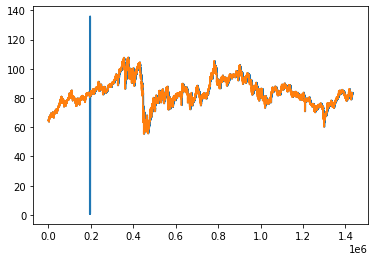

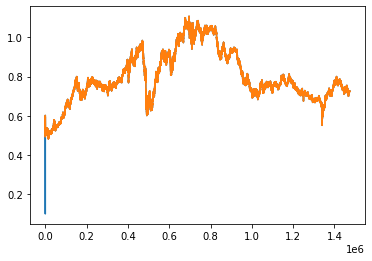

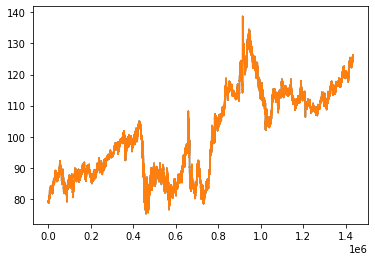

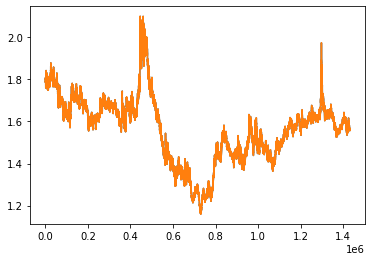

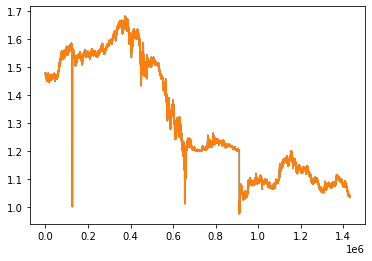

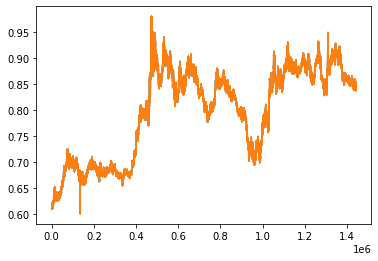

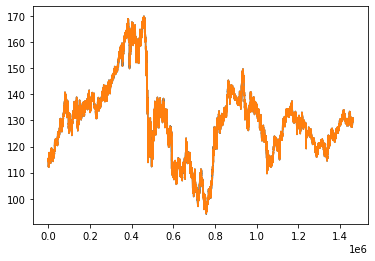

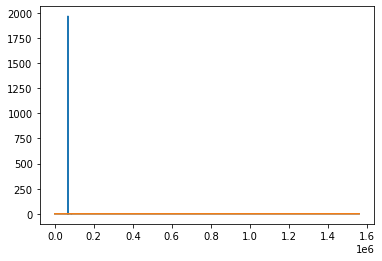

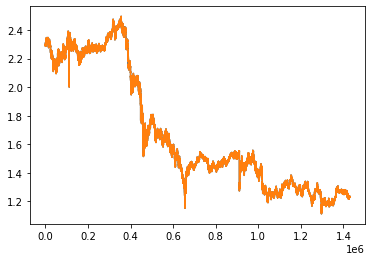

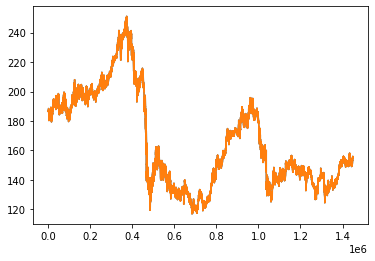

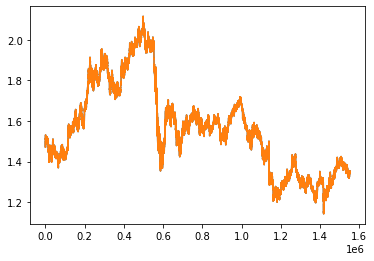

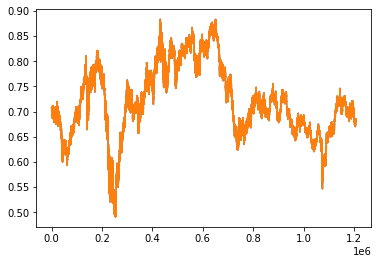

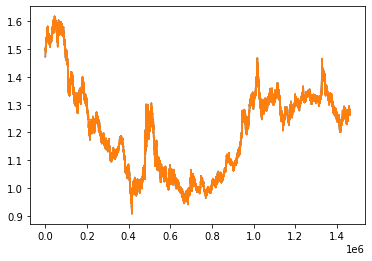

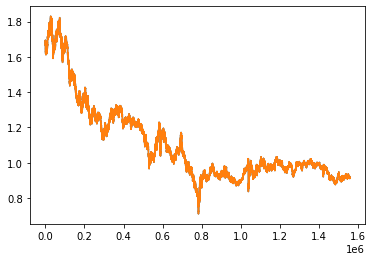

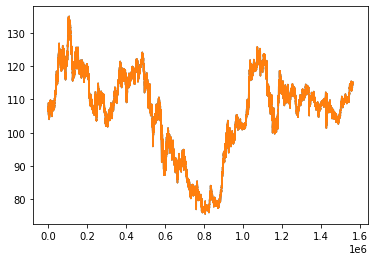

In [8]:
for i in range(len(files)):
    x = pd.read_csv(files[i])
    plt.plot(x["Close"])
    x = Load(target_dir+"/"+files[i].split("/")[-1]+"_candle_classes")
    plt.plot([i.c for i in x])
    plt.show()